## Preprocessing

In [48]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [49]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [50]:
# Determine the number of unique values in each column.
app_cat = application_df.dtypes.index.tolist()
application_df[app_cat].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [51]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df['APPLICATION_TYPE'].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [52]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_type_count[app_type_count < 600].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [53]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()

In [54]:
# You may find it helpful to look at CLASSIFICATION value counts >1
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [55]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummies = pd.get_dummies(application_df)
application_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [56]:
# Split our preprocessed data into our features and target arrays
X = application_dummies.drop('IS_SUCCESSFUL', axis=1).values
y = application_dummies['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 78)

In [57]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
#Get the iput shape
X_train_scaled.shape

(25724, 107)

## Compile, Train and Evaluate the Model
     Attempt #1

    APPLICATION_TYPE cutoff = 600
    CLASSIFICATION cutoff = 300
    layer1 = 9 : activation function = relu 
    layer2 = 18 : activation function = relu

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
# X shape/ input feature/columns is 43 * 2/3 is 86-129 so chose 80 for the first hidden node
hidden_node1 = 9
hidden_node2 = 18




nn_model_1 = tf.keras.models.Sequential()

# First hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features))

# Second hidden layer
nn_model_1.add(tf.keras.layers.Dense(units=hidden_node2, activation='relu'))



# Output layer
nn_model_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 9)                 972       
                                                                 
 dense_18 (Dense)            (None, 18)                180       
                                                                 
 dense_19 (Dense)            (None, 1)                 19        
                                                                 
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________


In [60]:
# I had to convert my y_train variable into a numpy array because of a tensorflow version issue
# I also added numpy in the dependencies
y_test = np.array(y_test)
y_train = np.array(y_train)

In [62]:
# Compile the model
nn_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:


# Train the model
fit_model_1 = nn_model_1.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
804/804 [==============================] - 1s 602us/step - loss: 0.5962 - accuracy: 0.7103
Epoch 2/100
804/804 [==============================] - 0s 586us/step - loss: 0.5602 - accuracy: 0.7296
Epoch 3/100
804/804 [==============================] - 0s 580us/step - loss: 0.5539 - accuracy: 0.7322
Epoch 4/100
804/804 [==============================] - 0s 584us/step - loss: 0.5516 - accuracy: 0.7315
Epoch 5/100
804/804 [==============================] - 0s 592us/step - loss: 0.5499 - accuracy: 0.7327
Epoch 6/100
804/804 [==============================] - 0s 576us/step - loss: 0.5491 - accuracy: 0.7320
Epoch 7/100
804/804 [==============================] - 0s 575us/step - loss: 0.5481 - accuracy: 0.7342
Epoch 8/100
804/804 [==============================] - 0s 578us/step - loss: 0.5475 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 0s 586us/step - loss: 0.5464 - accuracy: 0.7345
Epoch 10/100
804/804 [==============================] - 0s 583us/step - l

804/804 [==============================] - 0s 579us/step - loss: 0.5376 - accuracy: 0.7390
Epoch 80/100
804/804 [==============================] - 0s 576us/step - loss: 0.5373 - accuracy: 0.7392
Epoch 81/100
804/804 [==============================] - 0s 579us/step - loss: 0.5373 - accuracy: 0.7398
Epoch 82/100
804/804 [==============================] - 0s 580us/step - loss: 0.5369 - accuracy: 0.7398
Epoch 83/100
804/804 [==============================] - 0s 564us/step - loss: 0.5373 - accuracy: 0.7384
Epoch 84/100
804/804 [==============================] - 0s 562us/step - loss: 0.5369 - accuracy: 0.7384
Epoch 85/100
804/804 [==============================] - 0s 580us/step - loss: 0.5372 - accuracy: 0.7398
Epoch 86/100
804/804 [==============================] - 0s 568us/step - loss: 0.5372 - accuracy: 0.7390
Epoch 87/100
804/804 [==============================] - 0s 591us/step - loss: 0.5368 - accuracy: 0.7396
Epoch 88/100
804/804 [==============================] - 0s 563us/step - loss:

In [43]:
# Train the model
#  YOUR CODE GOES HERE

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5539 - accuracy: 0.7268 - 177ms/epoch - 662us/step
Loss: 0.5539003014564514, Accuracy: 0.7267638444900513


<AxesSubplot:>

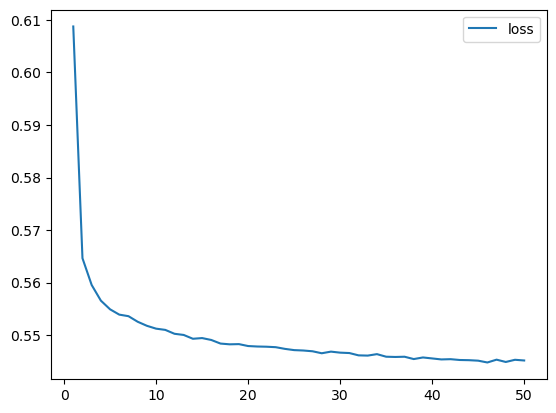

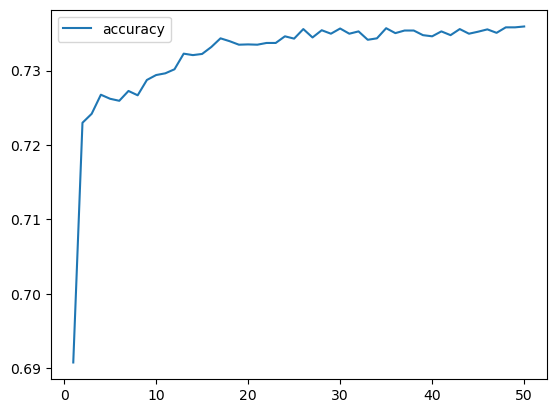

In [45]:
# Create a DataFrame containing training history of the 1st model
history_df = pd.DataFrame(fit_model_1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [64]:
# Export our model to HDF5 file
nn_model_1.save('h5_files/AlphabetSoupCharity_model_1.h5')

##     RESULTS:

    #    This is Attempt #1
    #    APPLICATION_TYPE cutoff = 600
    #    CLASSIFICATION cutoff = 300
    #    layer1 = 9 : activation function = relu
    #    layer2 = 18 : activation function = relu

    #    Loss: 0.5536191259042167, Accuracy: 0.7267638444900513

    #    loss value of 55 indicates that the model can be further optimized.
    #    The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

    #    I need to make some changes in order to get to 75% accuracy. 

    #     I also ran the following variables through this model:


    #    APPLICATION_TYPE cutoff = 600
    #    CLASSIFICATION cutoff = 300
    #    layer1 = 12
    #    layer2 = 24

    #    Loss: 0.5539003014564514, Accuracy: 0.7267638444900513





# Attempt #2 -- changing the activation functions

    APPLICATION_TYPE cutoff = 600

    CLASSIFICATION cutoff = 300

    layer1 = 9 : activation function = relu

    layer2 = 18 : activation function = tanh

    layer3 = 27 : activation function = tanh



In [81]:
# Define the 2nd model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])

hidden_nodes_layer1 = 9
hidden_nodes_layer2 = 18
# Add a third hidden layer
hidden_nodes_layer3 = 27

nn_model_2 = tf.keras.models.Sequential()

# First hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node1, activation='relu', input_dim=input_features,))

# Second hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node2, activation='tanh'))

# Third hidden layer
nn_model_2.add(tf.keras.layers.Dense(units=hidden_node3, activation='tanh'))


# Output layer (output is 1 and sigmoid because it's binary classifier)
nn_model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 9)                 972       
                                                                 
 dense_25 (Dense)            (None, 18)                180       
                                                                 
 dense_26 (Dense)            (None, 20)                380       
                                                                 
 dense_27 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Compile the  2nd model
nn_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:

# Train the 2nd model
fit_model_2 = nn_model_2.fit(X_train_scaled, y_train, epochs=100,callbacks=[cp_callback])



Epoch 1/100
804/804 [==============================] - 1s 630us/step - loss: 0.5868 - accuracy: 0.7036
Epoch 2/100
804/804 [==============================] - 0s 619us/step - loss: 0.5586 - accuracy: 0.7303
Epoch 3/100
804/804 [==============================] - 1s 636us/step - loss: 0.5532 - accuracy: 0.7324
Epoch 4/100
804/804 [==============================] - 1s 627us/step - loss: 0.5507 - accuracy: 0.7328
Epoch 5/100
746/804 [==========================>...] - ETA: 0s - loss: 0.5496 - accuracy: 0.7326
Epoch 5: saving model to checkpoints\weights.5.hdf5
804/804 [==============================] - 1s 628us/step - loss: 0.5491 - accuracy: 0.7325
Epoch 6/100
804/804 [==============================] - 0s 610us/step - loss: 0.5476 - accuracy: 0.7330
Epoch 7/100
804/804 [==============================] - 1s 623us/step - loss: 0.5469 - accuracy: 0.7327
Epoch 8/100
804/804 [==============================] - 1s 623us/step - loss: 0.5465 - accuracy: 0.7336
Epoch 9/100
804/804 [==================

804/804 [==============================] - 0s 616us/step - loss: 0.5369 - accuracy: 0.7385
Epoch 64/100
804/804 [==============================] - 0s 616us/step - loss: 0.5372 - accuracy: 0.7375
Epoch 65/100
753/804 [===========================>..] - ETA: 0s - loss: 0.5371 - accuracy: 0.7385
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 622us/step - loss: 0.5372 - accuracy: 0.7381
Epoch 66/100
804/804 [==============================] - 0s 610us/step - loss: 0.5372 - accuracy: 0.7386
Epoch 67/100
804/804 [==============================] - 0s 621us/step - loss: 0.5370 - accuracy: 0.7389
Epoch 68/100
804/804 [==============================] - 0s 621us/step - loss: 0.5367 - accuracy: 0.7396
Epoch 69/100
804/804 [==============================] - 1s 637us/step - loss: 0.5367 - accuracy: 0.7386
Epoch 70/100
734/804 [==========================>...] - ETA: 0s - loss: 0.5368 - accuracy: 0.7395
Epoch 70: saving model to checkpoints\weights.70

In [84]:
# Evaluate the 2nd model using the test data
model_loss, model_accuracy = nn_model_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 0s - loss: 0.5542 - accuracy: 0.7285 - 180ms/epoch - 672us/step
Loss: 0.5542294979095459, Accuracy: 0.7285131216049194


<AxesSubplot:>

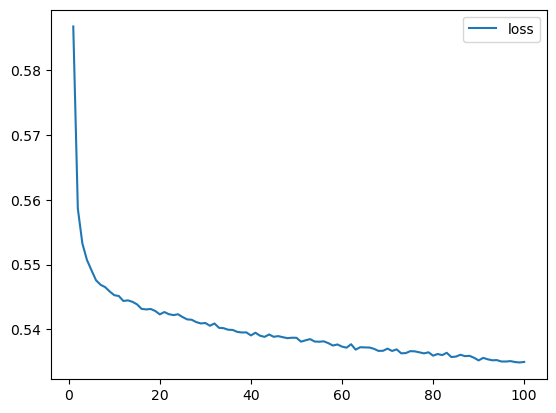

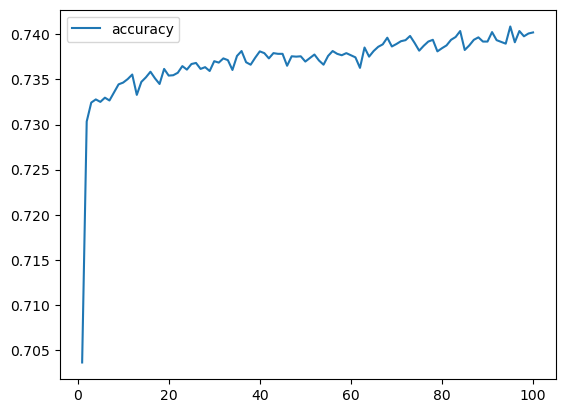

In [85]:
# Create a DataFrame containing training history of the 2nd model
history_df = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [86]:
# Save the 2nd model
nn_model_2.save('h5_files/AlphabetSoupCharity_model_2.h5')

# RESULTS:

    This is Attempt #2
    APPLICATION_TYPE cutoff = 600
    CLASSIFICATION cutoff = 300
    layer1 = 9 : activation function = relu
    layer2 = 18 : activation function = tanh
    layer3 = 27 : activation function = tanh

    Loss: 0.5513413424950647, Accuracy: 0.7266472578048706

    A loss value of 55 indicates that the model can be further optimized.
    The accuracy percent shows that 72% of the model's predicted values align with the true values in the original dataset.

    Still not at 75% accuracy. I give up.

    I also ran the following variables through this model:


    APPLICATION_TYPE cutoff = 600
    CLASSIFICATION cutoff = 300
    layer1 = 12
    layer2 = 24
    layer3 = 36

    Loss: 0.553035318851471, Accuracy: 0.7279300093650818